#Motivation

In the realm of computer architecture, the motivation behind studying and designing efficient and powerful computational systems is paramount. The constant evolution of computer technology drives the need to understand and optimize how hardware components interact with each other to achieve optimal performance. This introduction will explore the motivations behind the study of computer architecture and review some key concepts in this field.



#Review

Reviewing computer architecture encompasses several key concepts that are fundamental to understanding how modern computing systems are designed and operated. Let's delve into each of these concepts:



#Memory Hierarchy


<ipython-input-9-97ab8b6fa69e>:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_labels = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black') for i in range(len(memory_types))]


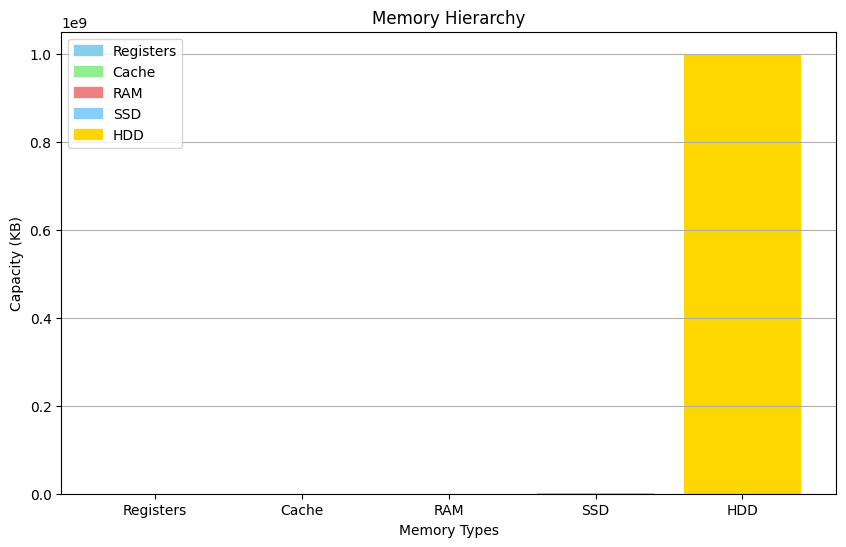

In [ ]:
import matplotlib.pyplot as plt

def visualize_memory_hierarchy():
    # Define memory types and their capacities (in KB)
    memory_types = ['Registers', 'Cache', 'RAM', 'SSD', 'HDD']
    capacities = [1, 256, 8192, 1024000, 1000000000]  # Example capacities in KB
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'gold']  # Define colors for each memory type

    plt.figure(figsize=(10, 6))
    bars = plt.bar(memory_types, capacities, color=colors)
    plt.xlabel('Memory Types')
    plt.ylabel('Capacity (KB)')
    plt.title('Memory Hierarchy')
    plt.grid(axis='y')

    # Create a legend for memory types and colors
    legend_labels = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black') for i in range(len(memory_types))]
    plt.legend(legend_labels, memory_types, loc='best')

    plt.show()

# Example usage
visualize_memory_hierarchy()


#Processing Units


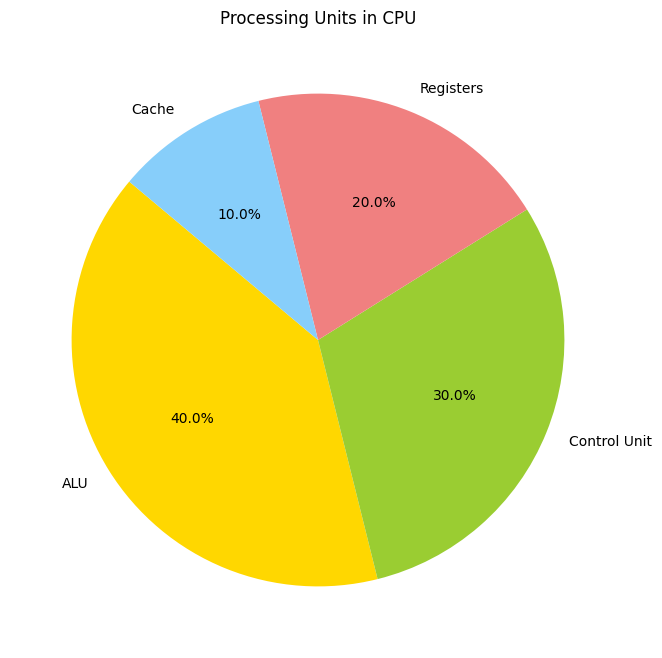

In [ ]:
def visualize_processing_units():
    # Define processing units and their importance (as a percentage)
    processing_units = ['ALU', 'Control Unit', 'Registers', 'Cache']
    importance_percentages = [40, 30, 20, 10]  # Example percentages

    plt.figure(figsize=(8, 8))
    plt.pie(importance_percentages, labels=processing_units, autopct='%1.1f%%', startangle=140, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
    plt.title('Processing Units in CPU')

    plt.show()

# Example usage
visualize_processing_units()


#Von Neumann Architecture:
The predominant computer model that separates memory and the CPU into distinct units, with a data/control bus enabling information transfer between them.



1. CPU (Central Processing Unit): The main processing unit that executes instructions.
2. Memory: Divided into:
* Program/Data Storage: Holds instructions and data for processing.
* Cache: Faster, smaller storage used for frequently accessed data.
3. Data/Control Bus: Connects the CPU and memory for data transfer and instruction fetch.

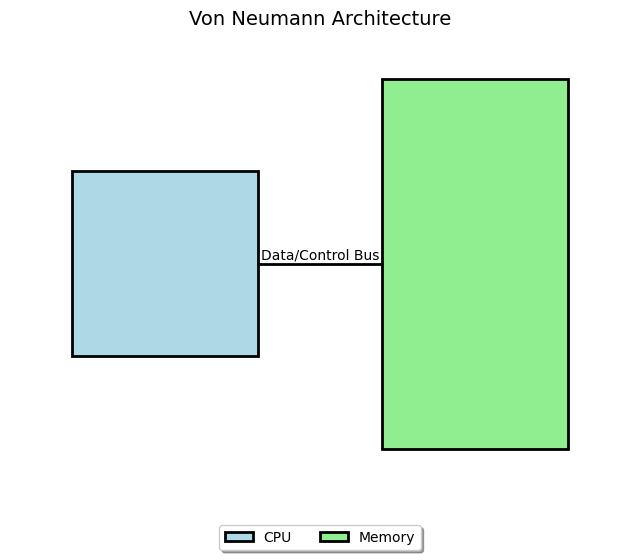

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_von_neumann_architecture():
    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Define colors
    cpu_color = 'lightblue'
    memory_color = 'lightgreen'
    bus_color = 'lightgrey'

    # CPU rectangle
    cpu_rect = patches.Rectangle((0.1, 0.3), 0.3, 0.4, linewidth=2, edgecolor='black', facecolor=cpu_color, label='CPU')
    ax.add_patch(cpu_rect)

    # Memory rectangle
    memory_rect = patches.Rectangle((0.6, 0.1), 0.3, 0.8, linewidth=2, edgecolor='black', facecolor=memory_color, label='Memory')
    ax.add_patch(memory_rect)

    # Bus line
    bus_line = plt.Line2D((0.4, 0.6), (0.5, 0.5), linewidth=2, color='black')
    ax.add_line(bus_line)

    # Annotation - Data/Control Bus
    ax.text(0.5, 0.52, 'Data/Control Bus', ha='center', va='center', fontsize=10)

    # Set axis limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_axis_off()

    # Title and legend
    ax.set_title('Von Neumann Architecture', fontsize=14)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

    # Show the diagram
    plt.show()

# Example usage
visualize_von_neumann_architecture()


In [ ]:
class VonNeumannArchitecture:
    def __init__(self, memory_size=1000, num_registers=8):
        self.memory = [0] * memory_size  # Main memory (initialized with zeros)
        self.registers = [0] * num_registers  # General-purpose registers (R0-R7)
        self.pc = 0  # Program counter (PC)

    def load_program(self, program):
        # Check if the program fits into memory
        if len(program) > len(self.memory):
            raise ValueError("Program size exceeds memory capacity")

        # Load the program into memory starting at address 0
        for i, instruction in enumerate(program):
            self.memory[i] = instruction

    def fetch_execute_cycle(self):
        while self.pc < len(self.memory):
            # Fetch
            instruction = self.memory[self.pc]
            self.pc += 1

            # Decode
            opcode = instruction // 100
            operand = instruction % 100

            # Execute
            if opcode == 1:  # LOAD
                value = self.memory[operand]
                self.registers[0] = value
                print(f"Loaded value {value} into register R0")
            elif opcode == 2:  # ADD
                value = self.memory[operand]
                self.registers[0] += value
                print(f"Added value {value} to register R0")
            elif opcode == 3:  # STORE
                self.memory[operand] = self.registers[0]
                print(f"Stored value from register R0 into memory address {operand}")
            elif opcode == 4:  # HALT
                print("Halt instruction encountered. Program execution completed.")
                break

# Example usage
def main():
    program = [101, 202, 303, 400]  # Example program: LOAD, ADD, STORE, HALT
    cpu = VonNeumannArchitecture()
    cpu.load_program(program)
    cpu.fetch_execute_cycle()

if __name__ == "__main__":
    main()

Loaded value 202 into register R0
Added value 303 to register R0
Stored value from register R0 into memory address 3


#Memory Types:
From cache memory to main memory (RAM) and long-term storage memory (like hard drives and SSDs), understanding memory hierarchies and their impact on performance is essential.



In [ ]:
import random

class CacheMemory:
    def __init__(self, size):
        self.size = size
        self.data = {}

    def read(self, address):
        if address in self.data:
            return self.data[address]
        else:
            print(f"Cache miss at address {address}")
            # Simulate fetching data from RAM (assuming cache miss)
            data = MainMemory().read(address)
            self.data[address] = data  # Store data in cache
            return data

class MainMemory:
    def __init__(self):
        # Simulate RAM with random data
        self.data = {i: random.randint(1, 100) for i in range(10000)}

    def read(self, address):
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Main Memory at address {address}")
            return None

class StorageMemory:
    def __init__(self):
        # Simulate storage memory (e.g., hard drive or SSD)
        self.data = {}

    def read(self, address):
        # Simulate fetching data from storage (e.g., hard drive or SSD)
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Storage at address {address}")
            return None

# Example usage
def main():
    # Create cache memory and main memory instances
    cache = CacheMemory(size=1000)
    ram = MainMemory()
    storage = StorageMemory()

    # Simulate reading data from different memory levels
    address = random.randint(0, 9999)  # Random memory address

    # Read from cache (may result in cache miss)
    data_from_cache = cache.read(address)
    if data_from_cache is not None:
        print(f"Data from cache: {data_from_cache}")

    # Read from main memory (after cache miss or direct read)
    data_from_ram = ram.read(address)
    if data_from_ram is not None:
        print(f"Data from main memory (RAM): {data_from_ram}")

    # Read from storage (if not found in main memory)
    if data_from_ram is None:
        data_from_storage = storage.read(address)
        if data_from_storage is not None:
            print(f"Data from storage: {data_from_storage}")
        else:
            print("Data not found in any memory level")

if __name__ == "__main__":
    main()

Cache miss at address 1680
Data from cache: 81
Data from main memory (RAM): 23


#Processing Units:
Understanding arithmetic-logic units (ALU), control units, and other key CPU components that execute instructions and perform calculations

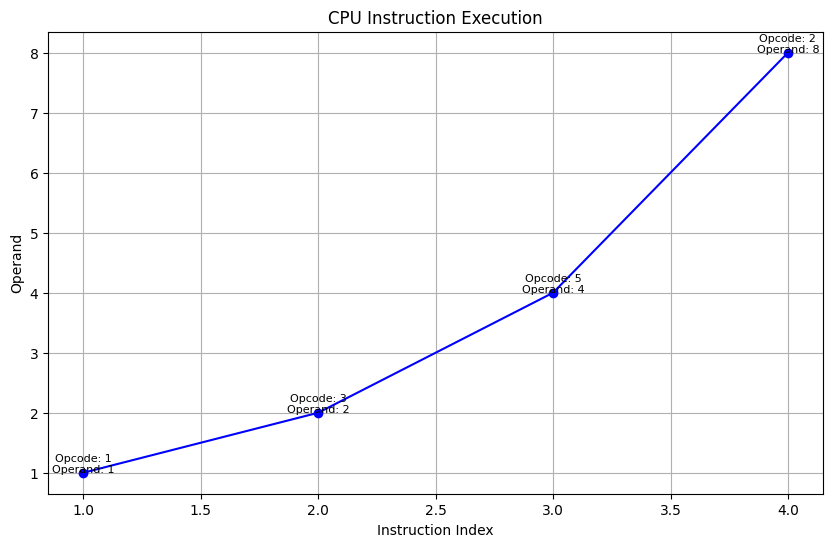

In [ ]:
import matplotlib.pyplot as plt

class CPU:
    def __init__(self):
        self.alu = ALU()
        self.control_unit = ControlUnit()
        self.registers = [0] * 8  # General-purpose registers (R0-R7)

    def execute_instruction(self, opcode, operand):
        # Execute instruction based on opcode
        if opcode == 1:  # ADD
            self.registers[0] = self.alu.add(self.registers[0], operand)
        elif opcode == 2:  # SUBTRACT
            self.registers[0] = self.alu.subtract(self.registers[0], operand)
        elif opcode == 3:  # MULTIPLY
            self.registers[0] = self.alu.multiply(self.registers[0], operand)
        elif opcode == 4:  # DIVIDE
            self.registers[0] = self.alu.divide(self.registers[0], operand)
        elif opcode == 5:  # LOAD
            self.registers[0] = operand
        elif opcode == 6:  # STORE
            # Simulate storing in memory (not implemented in this example)
            pass
        else:
            print(f"Invalid opcode: {opcode}")

    def visualize_execution(self, executed_instructions):
        # Prepare data for visualization
        x_values = list(range(1, len(executed_instructions) + 1))
        y_values = [operand for _, operand in executed_instructions]  # Extract operands

        # Plot executed instructions and operands
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
        plt.title('CPU Instruction Execution')
        plt.xlabel('Instruction Index')
        plt.ylabel('Operand')
        plt.grid(True)

        # Annotate each executed instruction
        for i, (opcode, operand) in enumerate(executed_instructions):
            plt.text(x_values[i], operand, f"Opcode: {opcode}\nOperand: {operand}", fontsize=8, ha='center')

        plt.show()

class ALU:
    def add(self, x, y):
        return x + y

    def subtract(self, x, y):
        return x - y

    def multiply(self, x, y):
        return x * y

    def divide(self, x, y):
        if y != 0:
            return x / y
        else:
            return None  # Division by zero error (not handled in this example)

class ControlUnit:
    def decode_instruction(self, instruction):
        # Decode instruction into opcode and operand
        opcode = instruction // 100
        operand = instruction % 100
        return opcode, operand

    def dispatch_instruction(self, cpu, opcode, operand):
        # Dispatch instruction to CPU for execution
        cpu.execute_instruction(opcode, operand)

# Example usage
def main():
    cpu = CPU()

    # Example instructions (opcode, operand)
    instructions = [
        101,  # ADD 1 to R0
        302,  # MULTIPLY R0 by 2
        504,  # LOAD 4 into R0
        208   # SUBTRACT 8 from R0
    ]

    executed_instructions = []

    # Execute instructions
    for instruction in instructions:
        opcode, operand = cpu.control_unit.decode_instruction(instruction)
        cpu.control_unit.dispatch_instruction(cpu, opcode, operand)
        executed_instructions.append((opcode, operand))

    # Visualize executed instructions
    cpu.visualize_execution(executed_instructions)

if __name__ == "__main__":
    main()


#Storage Hierarchy

In [ ]:
import random

class CPU:
    def __init__(self):
        self.registers = [0] * 8  # General-purpose registers (R0-R7)

    def read_register(self, register_idx):
        return self.registers[register_idx]

    def write_register(self, register_idx, data):
        self.registers[register_idx] = data

class CacheMemory:
    def __init__(self, size):
        self.size = size
        self.data = {}

    def read(self, address):
        if address in self.data:
            return self.data[address]
        else:
            print(f"Cache miss at address {address}")
            # Simulate fetching data from main memory (assuming cache miss)
            data = MainMemory().read(address)
            self.data[address] = data  # Store data in cache
            return data

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to cache address {address}")

class MainMemory:
    def __init__(self):
        # Simulate RAM with random data
        self.data = {i: random.randint(1, 100) for i in range(10000)}

    def read(self, address):
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Main Memory at address {address}")
            return None

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to Main Memory address {address}")

class SecondaryStorage:
    def __init__(self):
        # Simulate secondary storage (e.g., HDD or SSD)
        self.data = {}

    def read(self, address):
        # Simulate reading data from storage
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Secondary Storage at address {address}")
            return None

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to Secondary Storage address {address}")

class CloudStorage:
    def __init__(self):
        # Simulate cloud storage (e.g., remote server)
        self.data = {}

    def read(self, address):
        # Simulate reading data from cloud storage
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Cloud Storage at address {address}")
            return None

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to Cloud Storage address {address}")

# Example usage
def main():
    cpu = CPU()
    cache = CacheMemory(size=1000)
    main_memory = MainMemory()
    secondary_storage = SecondaryStorage()
    cloud_storage = CloudStorage()

    # Simulate data access across storage hierarchy
    register_data = cpu.read_register(0)
    cache_data = cache.read(500)
    main_memory_data = main_memory.read(2000)
    secondary_storage_data = secondary_storage.read(5000)
    cloud_storage_data = cloud_storage.read(10000)

    # Simulate data write to different storage levels
    cpu.write_register(1, 50)
    cache.write(600, 75)
    main_memory.write(3000, 80)
    secondary_storage.write(6000, 90)
    cloud_storage.write(11000, 100)

if __name__ == "__main__":
    main()


Cache miss at address 500
Data not found in Secondary Storage at address 5000
Data not found in Cloud Storage at address 10000
Data written to cache address 600
Data written to Main Memory address 3000
Data written to Secondary Storage address 6000
Data written to Cloud Storage address 11000


Cache miss at address 500
Data not found in Secondary Storage at address 5000
Data not found in Cloud Storage at address 10000


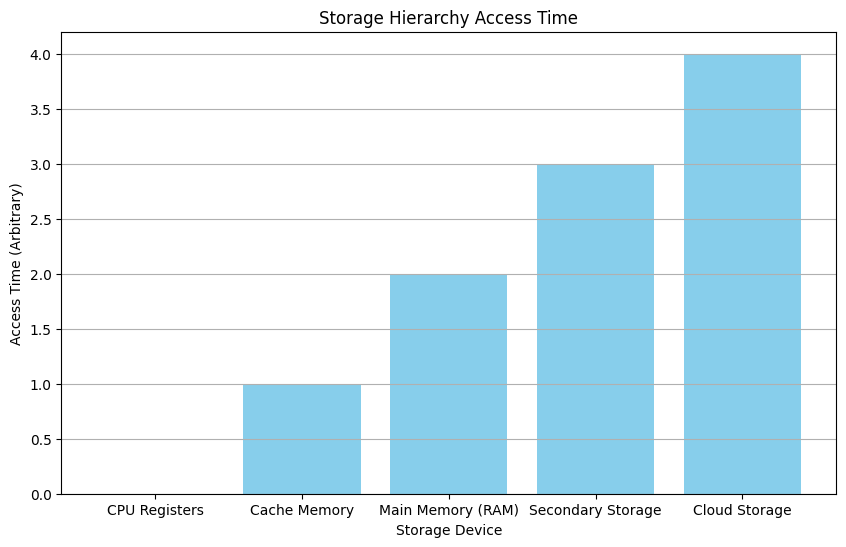

In [ ]:
import random
import matplotlib.pyplot as plt

class CPU:
    def __init__(self):
        self.registers = [0] * 8  # General-purpose registers (R0-R7)

    def read_register(self, register_idx):
        return self.registers[register_idx]

    def write_register(self, register_idx, data):
        self.registers[register_idx] = data

class CacheMemory:
    def __init__(self, size):
        self.size = size
        self.data = {}

    def read(self, address):
        if address in self.data:
            return self.data[address]
        else:
            print(f"Cache miss at address {address}")
            # Simulate fetching data from main memory (assuming cache miss)
            data = MainMemory().read(address)
            self.data[address] = data  # Store data in cache
            return data

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to cache address {address}")

class MainMemory:
    def __init__(self):
        # Simulate RAM with random data
        self.data = {i: random.randint(1, 100) for i in range(10000)}

    def read(self, address):
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Main Memory at address {address}")
            return None

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to Main Memory address {address}")

class SecondaryStorage:
    def __init__(self):
        # Simulate secondary storage (e.g., HDD or SSD)
        self.data = {}

    def read(self, address):
        # Simulate reading data from storage
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Secondary Storage at address {address}")
            return None

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to Secondary Storage address {address}")

class CloudStorage:
    def __init__(self):
        # Simulate cloud storage (e.g., remote server)
        self.data = {}

    def read(self, address):
        # Simulate reading data from cloud storage
        if address in self.data:
            return self.data[address]
        else:
            print(f"Data not found in Cloud Storage at address {address}")
            return None

    def write(self, address, data):
        self.data[address] = data
        print(f"Data written to Cloud Storage address {address}")

# Example usage with visualization
def main():
    cpu = CPU()
    cache = CacheMemory(size=1000)
    main_memory = MainMemory()
    secondary_storage = SecondaryStorage()
    cloud_storage = CloudStorage()

    # Simulate data access across storage hierarchy
    register_data = cpu.read_register(0)
    cache_data = cache.read(500)
    main_memory_data = main_memory.read(2000)
    secondary_storage_data = secondary_storage.read(5000)
    cloud_storage_data = cloud_storage.read(10000)

    # Plotting the storage hierarchy access
    storage_levels = ['CPU Registers', 'Cache Memory', 'Main Memory (RAM)', 'Secondary Storage', 'Cloud Storage']
    access_times = [0, 1, 2, 3, 4]  # Corresponding access times (arbitrary for demonstration)

    plt.figure(figsize=(10, 6))
    plt.bar(storage_levels, access_times, color='skyblue')
    plt.xlabel('Storage Device')
    plt.ylabel('Access Time (Arbitrary)')
    plt.title('Storage Hierarchy Access Time')
    plt.grid(axis='y')

    plt.show()

if __name__ == "__main__":
    main()